Notebook: Gradient Boosting for EV Battery Life Estimation
1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


2. Synthetic Data Generation

In [2]:
np.random.seed(42)

# Number of samples
n_samples = 1000

# Simulate features
cycle_count = np.random.randint(100, 1000, n_samples)
avg_temp = np.random.normal(30, 5, n_samples)             # avg temp around 30°C ±5
max_voltage = np.random.uniform(4.0, 4.3, n_samples)
internal_resistance = 40 + 0.05 * cycle_count + np.random.normal(0, 2, n_samples)  # resistance grows with cycles
depth_of_discharge = np.random.uniform(50, 100, n_samples)
humidity = np.random.uniform(20, 60, n_samples)

# True battery life (RUL) with noise and nonlinear dependence
remaining_life = 2000 - 1.5 * cycle_count - 10 * (avg_temp - 25) \
                 - 20 * (internal_resistance - 40) + np.random.normal(0, 50, n_samples)

df = pd.DataFrame({
    'cycle_count': cycle_count,
    'avg_temp': avg_temp,
    'max_voltage': max_voltage,
    'internal_resistance': internal_resistance,
    'depth_of_discharge': depth_of_discharge,
    'humidity': humidity,
    'remaining_life': remaining_life
})

df.head()


,cycle_count,avg_temp,max_voltage,internal_resistance,depth_of_discharge,humidity,remaining_life
0,202,34.116763,4.096665,48.410567,56.100371,59.247262,1448.838811
1,535,40.262264,4.037570,65.113828,85.069164,38.650131,513.647150
2,960,31.255975,4.142301,89.767722,55.672041,51.677425,-501.189051
3,370,27.731017,4.034187,58.064453,99.845461,36.092282,976.233481
4,206,19.853846,4.145805,50.285600,59.172620,36.998141,1586.815357


3. Exploratory Data Analysis (EDA)

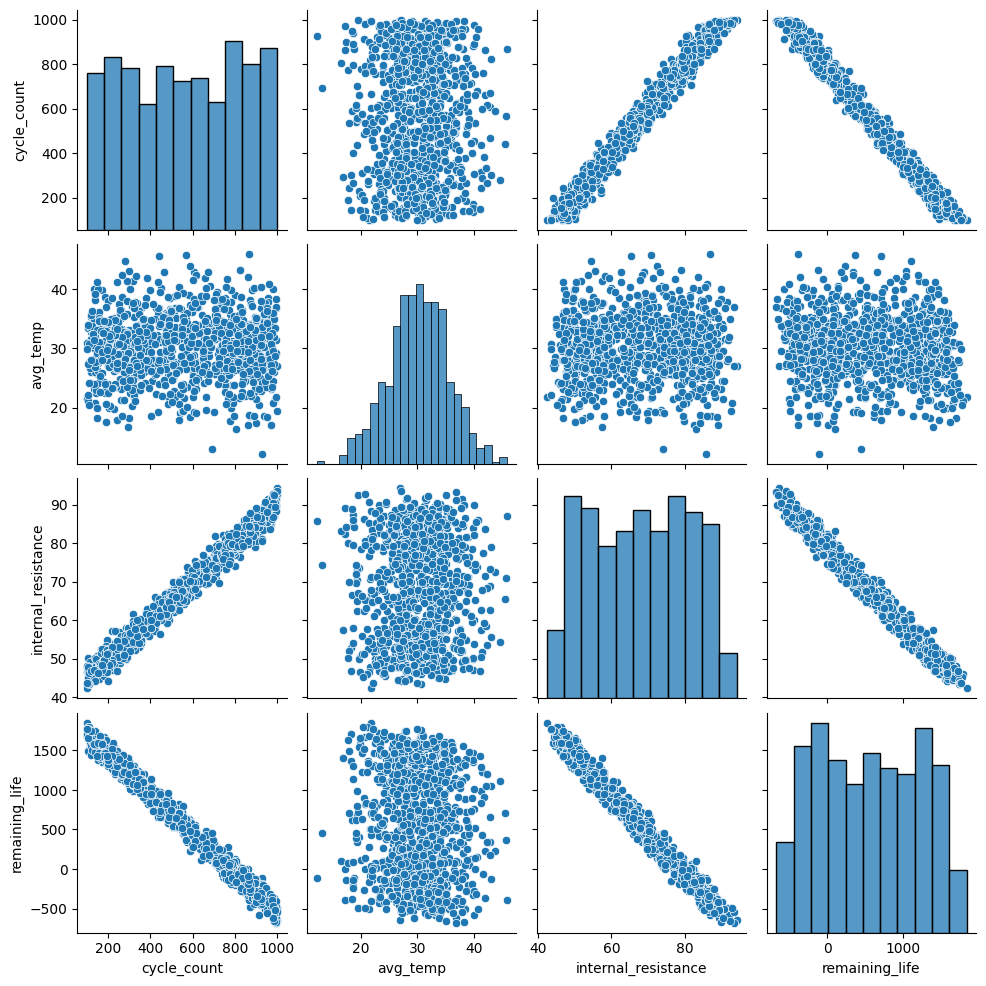

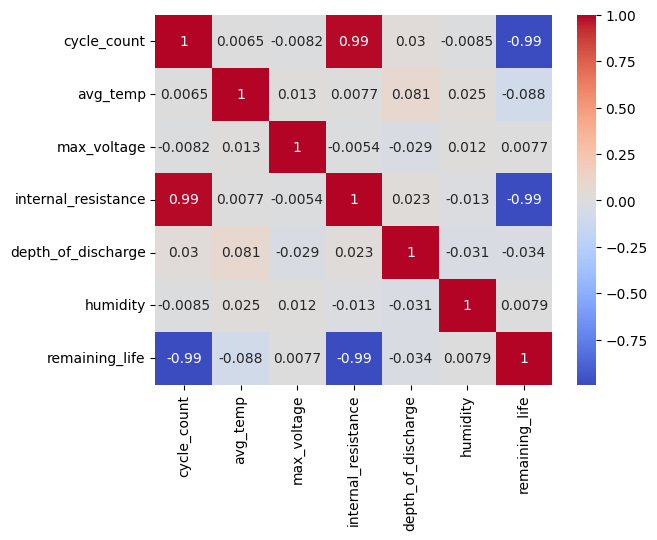

In [3]:
sns.pairplot(df, vars=['cycle_count', 'avg_temp', 'internal_resistance', 'remaining_life'])
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


4. Train-Test Split

In [4]:
X = df.drop(columns=['remaining_life'])
y = df['remaining_life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Training Gradient Boosting Regressor

In [5]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

6. Evaluation

Test MSE: 3541.33
Test R2: 0.99


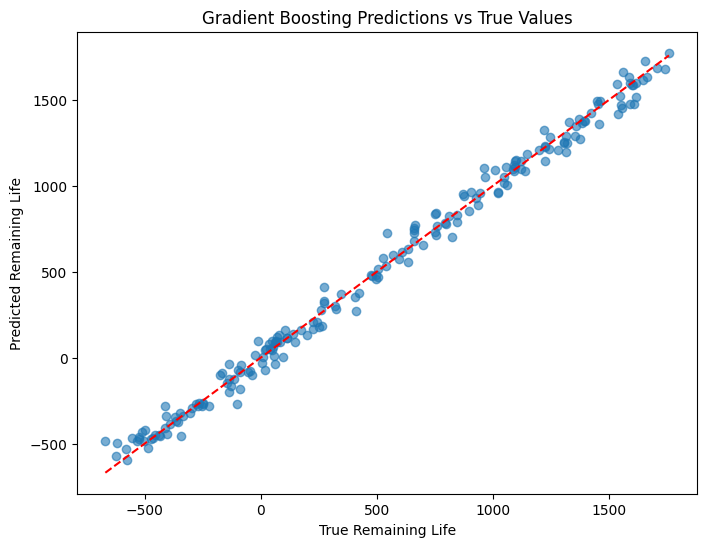

In [6]:
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R2: {r2:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Remaining Life")
plt.ylabel("Predicted Remaining Life")
plt.title("Gradient Boosting Predictions vs True Values")
plt.show()


7. Residual Analysis

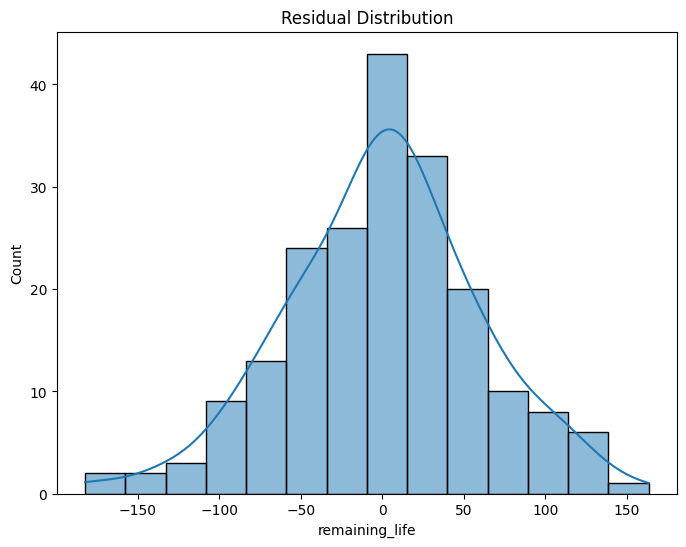

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


8. Save Model for Deployment

In [8]:
import joblib
joblib.dump(gbr, 'ev_battery_life_gbr_model.pkl')
print("Model saved as 'ev_battery_life_gbr_model.pkl'")


Model saved as 'ev_battery_life_gbr_model.pkl'
